# Bayesian Analysis and Theory
# Project 2

**Naman Chhibbar, MA21BTECH11011** \
**Abhay Gupta, BM21BTECH11001**

## Installing and Importing Dependencies

In [1]:
# Uncomment and run the following line to install the required packages
# !pip install -qU numpy scipy pandas matplotlib

In [2]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(69)

## Importing Data

In [3]:
data_path = 'combined_data.csv'

df = pd.read_csv(data_path)
df.tail()

,Product,Quantity Ordered,Total Revenue,Month
223,ThinkPad Laptop,541,540994.59,December
224,USB-C Charging Cable,3251,38849.45,December
225,Vareebadd Phone,285,114000.00,December
226,Wired Headphones,2748,32948.52,December
227,iPhone,908,635600.00,December


In [4]:
# Extract columns of interest
data = df[['Product', 'Total Revenue', 'Month']]
data.tail()

,Product,Total Revenue,Month
223,ThinkPad Laptop,540994.59,December
224,USB-C Charging Cable,38849.45,December
225,Vareebadd Phone,114000.00,December
226,Wired Headphones,32948.52,December
227,iPhone,635600.00,December


In [5]:
# Choose a random product
products = data['Product'].unique()
product = np.random.choice(products)
product

'LG Washing Machine'

In [6]:
# Extract product data
filt = data['Product'] == product
product_data = data[filt]['Total Revenue']
product_data.tail()

144    28800.0
163    27600.0
182    36600.0
201    31800.0
220    48000.0
Name: Total Revenue, dtype: float64

In [7]:
# Data split
ind = int(len(product_data) / 2)
known_data = product_data.iloc[:ind]
unknown_data = product_data.iloc[ind:]

## Data Modelling and Analysis

We model the data assuming it follows a normal distribution with known mean.
Hence, data $X | \mu \sim N(\mu, \sigma^2)$, where $\sigma^2$ is known.

$$ f(x | \mu) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$

We take the variance of our model to be the sample variance of the known data:

$$ S^2 = \sum_{i = 1}^{n} \frac{(x_i - \mu_x)^2}{n - 1} $$

where $\mu_x$ is the sample mean of the known data.

The likelihood function, given the sample $\bar{x} = (x_1, x_2, \dots, x_n)$, can be calculated as:

$$
\begin{align*}
L(\mu | \bar{x}) &= \prod_{i = 1}^{n} f(x_i | \mu) \\
&= \prod_{i = 1}^{n} \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{\sum_{i = 1}^{n} (x_i - \mu)^2}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{\sum_{i = 1}^{n} (\mu^2 - 2x_i ~ \mu + x_i^2)}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu + \sum_{i = 1}^{n} x_i^2}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{n}{2\sigma^2} \left(\mu^2 - 2\sum_{i = 1}^{n} x_i / n ~ \mu\right)\right) \\
&\propto \exp\left(-\frac{(\mu - \mu_x)^2}{2 \cdot \sigma^2 / n}\right) \\
\end{align*}
$$

Supose $\mu \sim N(u, v)$ is the prior distribution of $\mu$, then:

$$
\begin{align*}
f(\mu) &= \frac{1}{\sqrt{2\pi v}} \exp\left(-\frac{(\mu - u)^2}{2v}\right) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu + u^2}{2v}\right) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu}{2v}\right)
\end{align*}
$$

The posterior distribution will be:

$$
\begin{align*}
f(\mu | \bar{x}) &\propto f(\mu) \cdot L(\mu | \bar{x}) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu}{2v}\right) \cdot \exp\left(-\frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{\mu^2 - 2u \mu}{2v} - \frac{n \mu^2 - 2\sum_{i = 1}^{n} x_i ~ \mu}{2\sigma^2}\right) \\
&\propto \exp\left(-\frac{1}{2v \sigma^2} \left((n v + \sigma^2) \mu^2 - 2(u \sigma^2 + v \sum_{i = 1}^{n} x_i ~ \mu)\right)\right) \\
&\propto \exp\left(-\frac{n v + \sigma^2}{2v \sigma^2} \left(\mu - \frac{u \sigma^2 + v \sum_{i = 1}^{n} x_i}{n v + \sigma^2}\right)^2\right) \\
&\propto \exp\left(-\frac{1}{2v'} (\mu - u')^2\right)
\end{align*}
$$

where $u' = \left(u \sigma^2 + v \sum_{i = 1}^{n} x_i\right) / (n v + \sigma^2)$ and $v' = v \sigma^2/(n v + \sigma^2)$.

By the kernel of the posterior distribution, it is evident that $\mu | \bar{x} \sim N(u', v')$.

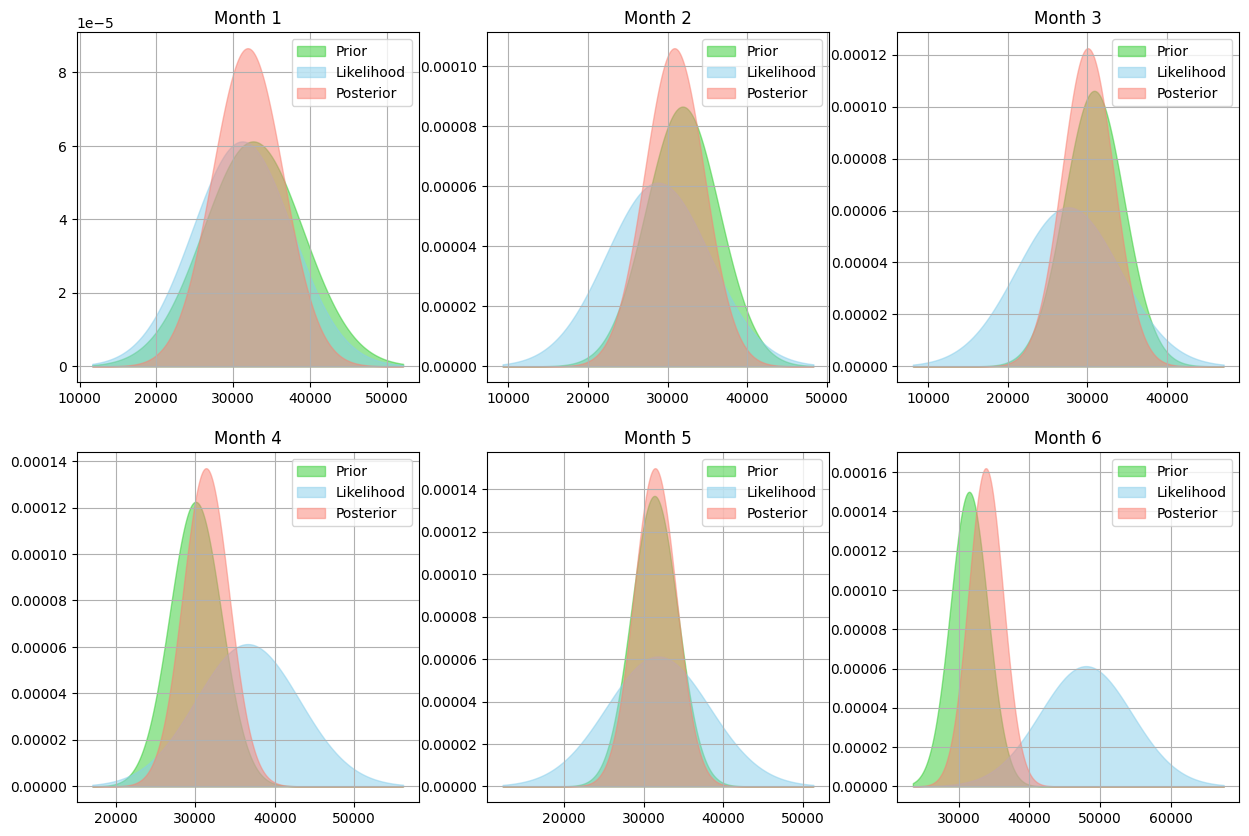

In [8]:
# Sample variance
data_var = known_data.var()

# Prior mean and variance
prior_mean = known_data.mean()
prior_var = data_var

# Likelihood variance
likelihood_var = data_var

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()
num_points = 1000
alpha = .5

posterior_mean_list = []
posterior_var_list = []

for i, revenue in enumerate(unknown_data):

  # Likelihood mean
  likelihood_mean = revenue

  # Mu grid
  lower = min(prior_mean - 3 * prior_var**.5, likelihood_mean - 3 * likelihood_var**.5)
  upper = max(prior_mean + 3 * prior_var**.5, likelihood_mean + 3 * likelihood_var**.5)
  grid = np.linspace(lower, upper, num_points)

  # Get prior
  prior_vals = st.norm.pdf(grid, prior_mean, prior_var**.5)

  # Compute likelihood
  likelihood_vals = st.norm.pdf(grid, likelihood_mean, likelihood_var**.5)

  # Compute posterior
  posterior_mean = (prior_mean * data_var + prior_var * revenue) / (prior_var + data_var)
  posterior_var = prior_var * data_var / (prior_var + data_var)
  posterior_vals = st.norm.pdf(grid, posterior_mean, posterior_var ** .5)
  posterior_mean_list.append(posterior_mean)
  posterior_var_list.append(posterior_var)

  # Plot prior, likelihood, posterior
  ax[i].set_title(f'Month {i + 1}')
  ax[i].fill_between(grid, prior_vals, label='Prior', color='limegreen', alpha=alpha)
  ax[i].fill_between(grid, likelihood_vals, label='Likelihood', color='skyblue', alpha=alpha)
  ax[i].fill_between(grid, posterior_vals, label='Posterior', color='salmon', alpha=alpha)
  ax[i].grid()
  ax[i].legend()

  # Update prior
  prior_mean = posterior_mean
  prior_var = posterior_var

plt.show()

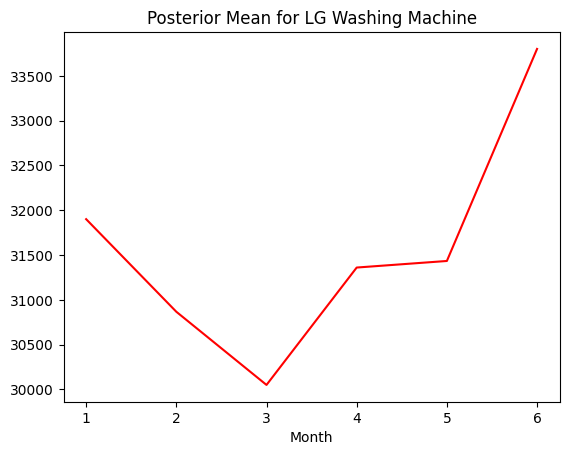

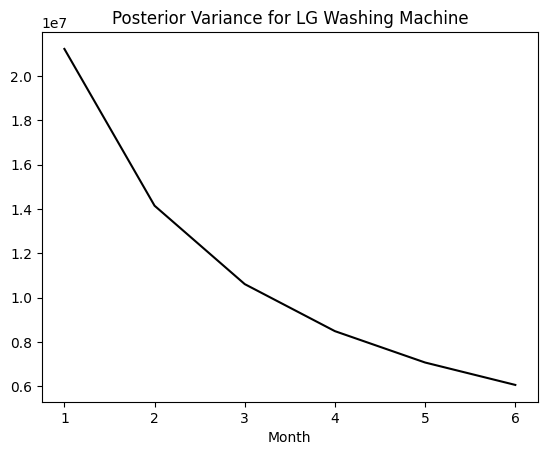

In [9]:
month_range = range(1, len(unknown_data) + 1)

plt.plot(month_range, posterior_mean_list, color="red")
plt.title(f"Posterior Mean for {product}")
plt.xlabel("Month")
plt.show()

plt.plot(month_range, posterior_var_list, color="black")
plt.title(f"Posterior Variance for {product}")
plt.xlabel("Month")
plt.show()

## Confidence Interval

Confidence interval with confidence level $\alpha$ is $(c, c')$ such that:

$$ \mathbb{P}[\pi \in (c, c')] = \alpha $$

For a continuous distribution with the cdf $F$, the values of $c$ and $c'$ are:

$$
c = F^{-1}\left(\frac{1 - \alpha}{2}\right) \qquad
c' =F^{-1}\left(\frac{1 + \alpha}{2}\right)
$$

Posterior Mean: 33800.0
95.0% Confidence Interval: (28974.46108591126, 38625.53891408874)


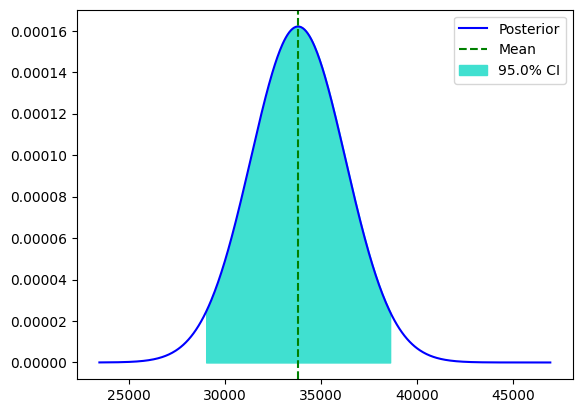

In [10]:
post_vals = st.norm.pdf(grid, posterior_mean, posterior_var ** .5)
filt = post_vals > 1e-10
grid = grid[filt]
post_vals = post_vals[filt]

confidence = .95

lower_bound = st.norm.ppf((1 - confidence) / 2, posterior_mean, posterior_var ** .5)
upper_bound = st.norm.ppf((1 + confidence) / 2, posterior_mean, posterior_var ** .5)
ci_filt = (grid > lower_bound) & (grid < upper_bound)

plt.plot(grid, post_vals, label="Posterior", color="blue")
plt.axvline(posterior_mean, label="Mean", color="green", linestyle="--")
plt.fill_between(
  grid, post_vals, where=ci_filt,
  label=f"{100 * confidence}% CI", color="turquoise"
)

print(
  f"Posterior Mean: {posterior_mean}\n"
  f"{100 * confidence}% Confidence Interval: ({lower_bound}, {upper_bound})"
)

plt.legend()
plt.show()